# enviroCar log analyzing

This notebook provides some guidance in how to get some insights from enviroCar log files.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scripts import logparsing
from scripts import plotutils
import pandas as pd

plt.style.use('ggplot')

log_path = "./data/envirocar.log"

Parse an enviroCar log file for PID response messages and create a Pandas DataFrame. The resulting DataFrame is time indexed and contains information about a PID event and the corresponding measurement value.

In [2]:
df = logparsing.parse_envirocar_log_pids(log_path)
df

,pid,value
time,,
2021-11-23 18:21:34.568,CALCULATED_ENGINE_LOAD,11.372549
2021-11-23 18:21:34.625,INTAKE_MAP,36.000000
2021-11-23 18:21:34.683,RPM,768.000000
2021-11-23 18:21:34.731,SPEED,0.000000
2021-11-23 18:21:34.787,INTAKE_AIR_TEMP,8.000000
...,...,...
2021-11-23 18:22:59.942,TPS,22.000000
2021-11-23 18:23:00.031,CALCULATED_ENGINE_LOAD,12.549020
2021-11-23 18:23:00.107,INTAKE_MAP,42.000000


Now we will create a time-series plot of speed measurements for a certain timespan. Note that you can adjust the x-axis label tick frequency in seconds by using the `freq_seconds` parameter.

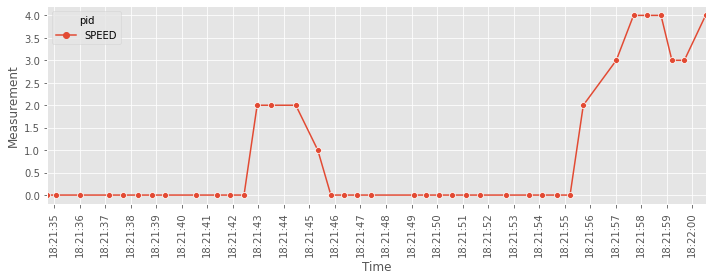

In [3]:
df_speed = df.loc[df["pid"] == "SPEED"]

plotutils.plot(df_speed.loc["2021-11-23T18:21:00":"2021-11-23T18:22:00"], freq_seconds=1)
